In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
mapCoverage = pd.read_csv("/Users/tracysanchezpacheco/Downloads/Unique_NodeVisit_Ratios.csv")

In [3]:
mapCoverage.head()

,ParticipantID,SessionNr,NodeCount,Experiment,Ratio
0,365,1,90,Exp1,0.569620
1,365,2,101,Exp1,0.639241
2,365,3,90,Exp1,0.569620
3,365,4,90,Exp1,0.569620
4,365,5,100,Exp1,0.632911


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_2371/1967773148.py:4: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.kdeplot(data=mapCoverage, x='Ratio',  hue='SessionNr',  palette=custom_husl)


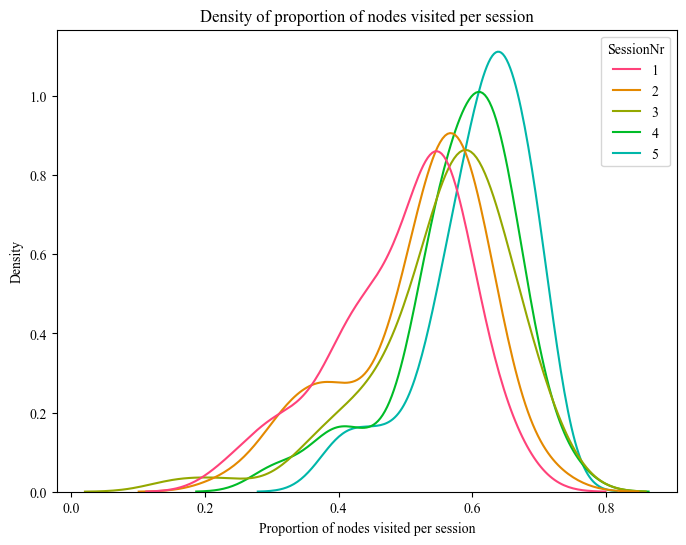

In [4]:
custom_husl = sns.husl_palette(n_colors=8, s=1.5, l=0.65)
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.family': 'Times New Roman'})
sns.kdeplot(data=mapCoverage, x='Ratio',  hue='SessionNr',  palette=custom_husl)
plt.title('Density of proportion of nodes visited per session')
plt.xlabel('Proportion of nodes visited per session')
plt.ylabel('Density')
plt.show()

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_2371/1192476040.py:10: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=mapCoverage, hue='SessionNr', x='Ratio', palette=custom_husl, ax=axes[0], orient='h')
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_2371/1192476040.py:15: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.kdeplot(data=mapCoverage, x='Ratio', hue='SessionNr', palette=custom_husl, ax=axes[1])


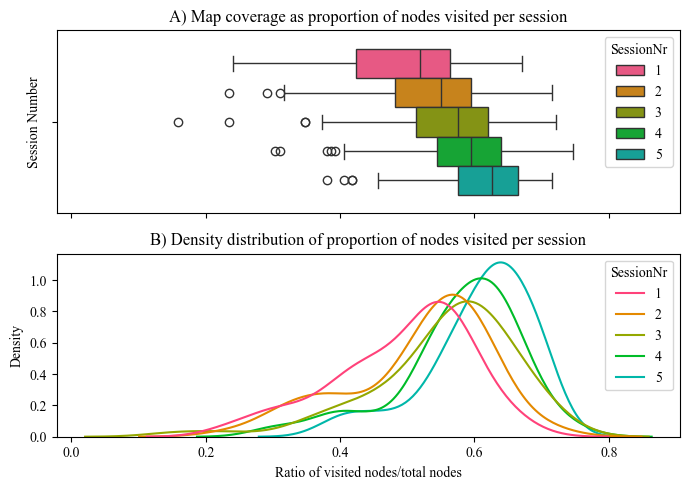

In [5]:
# Assuming 'mapCoverage' is your DataFrame and 'Ratio' and 'SessionNr' are columns in your DataFrame

# Create a custom palette
custom_husl = sns.husl_palette(n_colors=8, s=1.5, l=0.65)

# Set up the matplotlib figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)  # 2 rows, 1 column, sharing x-axis

# First subplot: Boxplot (Horizontal)
sns.boxplot(data=mapCoverage, hue='SessionNr', x='Ratio', palette=custom_husl, ax=axes[0], orient='h')
axes[0].set_title('A) Map coverage as proportion of nodes visited per session')
axes[0].set_ylabel('Session Number')

# Second subplot: KDE plot
sns.kdeplot(data=mapCoverage, x='Ratio', hue='SessionNr', palette=custom_husl, ax=axes[1])
axes[1].set_title('B) Density distribution of proportion of nodes visited per session')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Ratio of visited nodes/total nodes')
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Participants_Exploration_CoverageRatio.png",  bbox_inches="tight",
            pad_inches=0.3)
plt.show()


In [6]:
Complete_Behavioral = pd.read_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/BehavioralData_Fixations_Wide.csv", sep =",")

In [7]:
Participant_Coverage = mapCoverage.groupby("ParticipantID")["Ratio"].mean().reset_index()

In [8]:
Participant_Coverage.rename({"ParticipantID":"SubjectID" }, axis=1, inplace=True)

In [9]:
Beha = Complete_Behavioral.SubjectID.unique()
Cove = Participant_Coverage.SubjectID.unique()
difference = [item for item in Beha if item not in Cove]
print(difference)

[1142, 1234, 3193, 5191, 6266, 7393, 2069, 3540, 479, 2361, 3246, 3572, 3976, 5531, 7264]


In [10]:
Complete_Behavioral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16538 entries, 0 to 16537
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     16538 non-null  int64  
 1   SubjectID                      16538 non-null  int64  
 2   AbsolutError                   16538 non-null  float64
 3   SignedAngle-+180               16538 non-null  float64
 4   IQR                            16538 non-null  float64
 5   RT                             16538 non-null  float64
 6   DistanceToParticipant          16538 non-null  float64
 7   PointingTaskStartingLocations  16538 non-null  int64  
 8   TrialNumber                    16538 non-null  int64  
 9   StartPointID                   16538 non-null  int64  
 10  ID_for_StartingPosition        16538 non-null  int64  
 11  avatar_ID                      16538 non-null  int64  
 12  AvatarPresenceCategory         16538 non-null 

In [11]:
Complete_Concat=  pd.merge(Complete_Behavioral, Participant_Coverage, on='SubjectID', how='left')

In [12]:
Complete_Concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16538 entries, 0 to 16537
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     16538 non-null  int64  
 1   SubjectID                      16538 non-null  int64  
 2   AbsolutError                   16538 non-null  float64
 3   SignedAngle-+180               16538 non-null  float64
 4   IQR                            16538 non-null  float64
 5   RT                             16538 non-null  float64
 6   DistanceToParticipant          16538 non-null  float64
 7   PointingTaskStartingLocations  16538 non-null  int64  
 8   TrialNumber                    16538 non-null  int64  
 9   StartPointID                   16538 non-null  int64  
 10  ID_for_StartingPosition        16538 non-null  int64  
 11  avatar_ID                      16538 non-null  int64  
 12  AvatarPresenceCategory         16538 non-null 

In [13]:
# Replacing NaN values with the mean of that column
Complete_Concat['Ratio_inter'] = Complete_Concat['Ratio'].fillna(Complete_Concat['Ratio'].mean())

In [14]:
Complete_Concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16538 entries, 0 to 16537
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     16538 non-null  int64  
 1   SubjectID                      16538 non-null  int64  
 2   AbsolutError                   16538 non-null  float64
 3   SignedAngle-+180               16538 non-null  float64
 4   IQR                            16538 non-null  float64
 5   RT                             16538 non-null  float64
 6   DistanceToParticipant          16538 non-null  float64
 7   PointingTaskStartingLocations  16538 non-null  int64  
 8   TrialNumber                    16538 non-null  int64  
 9   StartPointID                   16538 non-null  int64  
 10  ID_for_StartingPosition        16538 non-null  int64  
 11  avatar_ID                      16538 non-null  int64  
 12  AvatarPresenceCategory         16538 non-null 

In [15]:
Complete_Concat.to_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/BehavioralData_Fixations_Wide_Coverage.csv")